<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2024notebooks/2024_1205Karapetian_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Karapetian+ (2023), Empirically Identifying and Computationally Modeling the Brain–Behavior Relationship for Human Scene Categorization, Journal of Cognitive Neuroscience 35:11, pp. 1879–1897, doi:10.1162/jocn_a_02043

データは，https://osf.io/4fdky/ より入手して，駒澤 Gdrive で共有

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f'device:{device}')

import os
try:
    import ipynb_path
except ImportError:
    !pip install ipynb-path
    import ipynb_path
__file__ = os.path.basename(ipynb_path.get())
print(f'__file__:{__file__}')

import numpy as np
import sys
import zipfile
import glob

import IPython
isColab = 'google.colab' in str(IPython.get_ipython())

if isColab:
    from google.colab import drive
    drive.mount('/content/drive')

    img_basedir = '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2023Karapetian+OSF/Stimuli'
    fnames = list(sorted(glob.glob(os.path.join(img_basedir,'*.jpg'))))
else:
    HOME = os.environ['HOME']
    img_basedir = os.path.join(HOME, 'study/2024Agnessa14_Perceptual-decision-making.git/Stimuli')
    fnames = list(sorted(glob.glob(os.path.join(img_basedir,'*.jpg'))))

import matplotlib.pyplot as plt
import PIL

try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

# Karapetian+(2023) で用いられた刺激画像の表示

In [ ]:
# 刺激画像の表示
nrows, ncols = 6, 10
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,9))
#fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,10))

i=0
for row in range(nrows):
    for col in range(ncols):
        img = PIL.Image.open(img_basedir+'/'+str(i+1)+'.jpg').convert('RGB')
        ax[row][col].imshow(img)
        ax[row][col].axis('off')
        ax[row][col].set_title(f'{i+1}')
        i += 1

# 1-10: アパート
#11-20: ベッド
#21-30: 高速道路
#31-40: 海岸
#41-50: 峡谷
#51-60: 森林
# 1-30 は，人工物情景であり，31-60 は，自然情景

# [Karapetian+2023 Github readme.txt](https://github.com/Agnessa14/Perceptual-decision-making/blob/master/README.md)

## readme.txt

この ReadMe は Empirically identifying and computationally modelling the brain-behaviour relationship for human scene categorization プロジェクトの OSF リポジトリの ReadMe である。
原稿で使用されたヒト (N=30) とモデルのデータが含まれている。
<!-- This is a ReadMe for the OSF repository to the project "Empirically identifying and computationally modelling the brain-behaviour relationship for human scene categorization" containing human (N=30) and model data used in the manuscript. -->

### 一般情報

注意散漫課題のデータは、後に用語が変更されたため fixation という名前で保存されている。
被験者の名前は，元の記録ファイルとの整合性を保つため，記録された名前 (5:26, 28:35) に従っている。
アップロードされたのは前処理済みのデータのみである。
生データにアクセスするには，遠慮なく agnessakarapetian@gmail.com まで。
<!--The data for the distraction task is saved under the name "fixation" due to a later change in terminology.
The subjects are named according to the names under which they were recorded (5:26, 28:35) to remain consistent with the original recording files.
Only preprocessed data were uploaded; to get access to raw data, don't hesitate to contact agnessakarapetian@gmail.com.   -->

### 前処理済 EEG データ

EEG データは，Fieldtrip の関数を用いて Matlab 2021a で前処理した。
そのため，前処理されたデータは Matlab の構造体（`timelock_categorization.mat` または `timelock_fixation.mat`）ファイルとして保存され，`timelock.trial` には各試行，電極 (計 63)，時点 (合計 200) の情報が含まれている。
刺激 ID は `timelock.trialinfo` の下にある。
前処理の詳細は原稿を参照。
<!--EEG data were preprocessed in Matlab 2021a using functions from Fieldtrip. The preprocessed data are therefore saved as a Matlab structure (timelock_categorization.mat or timelock_fixation.mat) file and timelock.trial contains information for each trial, electrode (total 63) and time point (total 200).
The stimulus IDs are under timelock.trialinfo. For preprocessing details, please refer to the manuscript.   -->

### 前処理済行動データ

被験者レベルの反応時間と課題精度は，EEG データの前処理後の全試行について利用可能である。
各被験者の正しい試行の反応時間は，刺激セットと同じ順序で `Behaviour/All_subjects` にある。
完全な行動データファイルについては，問い合わせてほしい。
<!--Subject-level reaction times and task accuracy are available for all trials that remained after preprocessing the EEG data.
The reaction times for the correct trials for each subject are available in Behaviour/All_subjects, in the same order as in the stimulus set.  
For complete behavioural data files, please get in touch.  -->

### モデル（RCNN）の行動データと重み

RCNN フォルダには，論文で使用した微調整済 RCNN の重み係数行列がある。
これは，BLnet (Spoerer+2020) であり，econet データセット (Mehrer2017) を用いて訓練し，Places-365 データセット (Zhou+2018) をもちいて微調整した。
シーン分類課題に対するモデルの反応時間を利用可能にし、刺激セットと同じ順序に従う。
<!--The RCNN folder contains weights for the fine-tuned RCNN used in the paper, BLnet (Spoerer et al., 2020), initially trained on ecoset (Mehrer et al., 2017)
but fine-tuned on a subset of Places-365 (Zhou et al., 2018).
The reaction times of the model to the scene categorization task are made available and follow the same order as in the stimulus set.  -->

### 刺激セット

刺激セットは 60 の情景画像で構成され，前半は人工物の情景，後半は自然物情景の画像である。
これらは Places-365 (Zhou+2018) の検証セットから取られ，中央で切り取られ，480x480 にリサイズされた。
オリジナルの画像については、`http://places2.csail.mit.edu/download.html`
<!--The stimulus set consists of 60 scene images: the first half depicts man-made scenes and the second half natural. These were taken from the validation set of Places-365 (Zhou et al., 2018), center-cropped and resized to 480x480.
For original images, please refer to http://places2.csail.mit.edu/download.html.  -->




#  反応時間データの読み込み

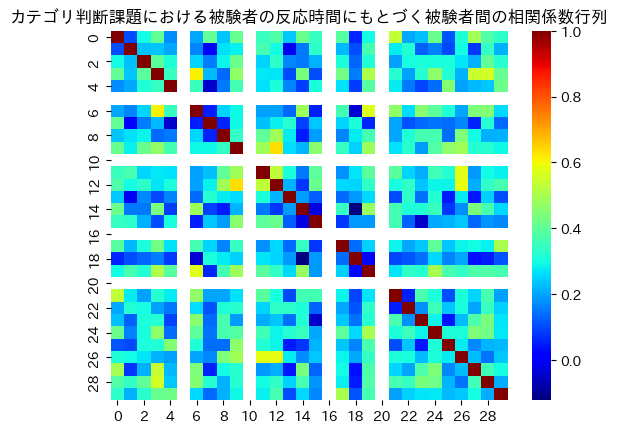

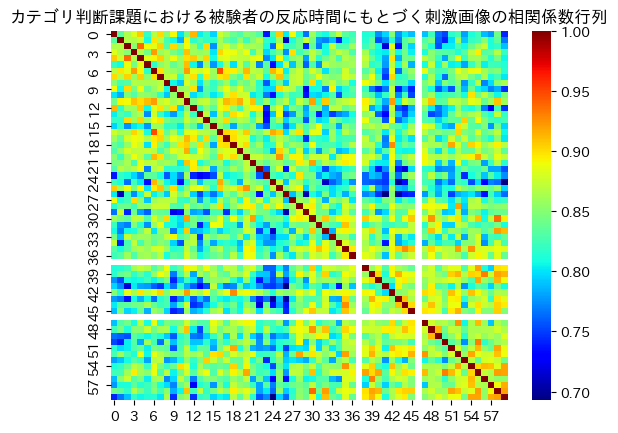

In [3]:
import scipy
import scipy.io  # Python から MATLAB で用いられるデータ .mat 形式のファイルを読み込むためには `scipy.io` が必要となる。
import seaborn

cmap = 'rainbow'
cmap = 'jet'
if isColab:
    basedir = "/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2023Karapetian+OSF/Behaviour/All_subjects/RTs"
else:
    basedir = os.path.join(HOME, 'study/2024Agnessa14_Perceptual-decision-making.git/Behaviour/All_subjects/RTs')


# MATLAB で作成された全被験者の反応時間データファイル名
fname = 'RT_all_subjects_5_35_categorization.mat'

# データファイルの読み込み
RT_subs_cats = scipy.io.loadmat(os.path.join(basedir, fname))
#print(f"RT_subs_cats['RTs'].shape:{RT_subs_cats['RTs'].shape}")

# 刺激 X 被験者の反応時間から刺激画像ごとの相関係数行列を求める
R_sub = np.corrcoef(RT_subs_cats['RTs'])
ax = plt.axes()
seaborn.heatmap(R_sub, ax=ax, cmap=cmap)
ax.set_title('カテゴリ判断課題における被験者の反応時間にもとづく被験者間の相関係数行列')
plt.show()

R_cat = np.corrcoef(RT_subs_cats['RTs'].T)
ax = plt.axes()
seaborn.heatmap(R_cat.T, ax=ax, cmap=cmap)
ax.set_title('カテゴリ判断課題における被験者の反応時間にもとづく刺激画像の相関係数行列')
plt.show()


#  EEG データの読み込み

--2024-12-06 00:32:09--  https://komazawa-deep-learning.github.io/2024assets/ASP-64.png
Resolving komazawa-deep-learning.github.io (komazawa-deep-learning.github.io)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to komazawa-deep-learning.github.io (komazawa-deep-learning.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113224 (111K) [image/png]
Saving to: ‘ASP-64.png’

ASP-64.png          100%[===================>] 110.57K  --.-KB/s    in 0.02s   

2024-12-06 00:32:10 (4.39 MB/s) - ‘ASP-64.png’ saved [113224/113224]



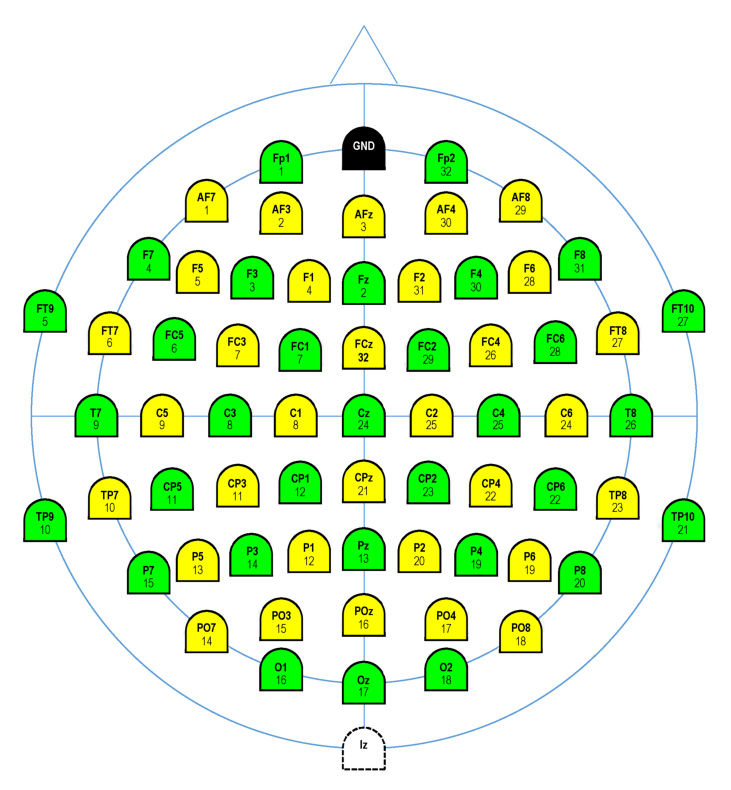

In [4]:
if not os.path.exists('ASP-64.png'):
    !wget https://komazawa-deep-learning.github.io/2024assets/ASP-64.png -O ASP-64.png
eeg_channels_img = PIL.Image.open('ASP-64.png')
plt.figure(figsize=(10,10))
plt.axis(False)
plt.imshow(eeg_channels_img)

In [5]:
import pickle
import os

pkl_fname = '2024_1205Stim_Chn_Karapetian2023.pkl'
if isColab:
    base_dir = '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/'
    pkl_fname = os.path.join(base_dir, pkl_fname)

with open(pkl_fname, 'rb') as f:
    _Stim_Chn = pickle.load(f)

# for stim_no in list(_Stim_Chn.keys()):
#     print(f'stim_no:{stim_no:2d}', end=":")
#     for chn in sorted(list(_Stim_Chn[stim_no].keys())):
#         print(chn, _Stim_Chn[stim_no][chn].shape, end=",")
#     print()


In [ ]:
# EEG チャンネルは以下のとおり:
channels_p = ['Fp1', 'Fp2', 'AF7','AF3','AFz','AF4','AF8',
              'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8',
              'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10',
              'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8',
              'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10',
              'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8',
              'PO7', 'PO3', 'POz', 'PO4', 'PO8',
              'O1', 'Oz', 'O2']

channels =  [#'Fp1', 'Fp2', 'AF7','AF3','AFz','AF4','AF8',
             #'F7', 'F5', 'F3', 'F1', 'F2', 'F4', 'F6', 'F8',
             #'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10',
             #'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8',
             #'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10',
             #'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8',
             #PO7', 'PO3', 'POz', 'PO4', 'PO8',
             'O1', 'Oz', 'O2'
             ]

# 刺激画像ごとに EEG チャンネルの値を描画
#nrows, ncols = 12, 5
nrows, ncols = 6, 10
figsize = (18, 10)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

print('# 刺激画像ごとに EEG チャンネルの値を描画')
legends = []
row, col = 0, 0
for stim_no in list(sorted(_Stim_Chn.keys())):
    for chn in channels:
        X = _Stim_Chn[stim_no][chn]
        axes[row][col].plot(X)
        axes[row][col].set_title(f'刺激番号:{stim_no}')
        axes[row][col].axis(False)

    col += 1
    if col > ncols-1:
        col = 0
        row += 1

fig.legend(channels)
plt.show()

##################################################################
nrows, ncols = 6, 10
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
i=0
for row in range(nrows):
    for col in range(ncols):
        idx = nrows * row + col + 1
        img = PIL.Image.open(fnames[idx]).convert('RGB')
        ax[row][col].imshow(img)
        ax[row][col].axis('off')
        ax[row][col].set_title(f'{i+1}')
        i += 1

# 1-10: アパート
#11-20: ベッド
#21-30: 高速道路
#31-40: 海岸
#41-50: 峡谷
#51-60: 森林
# 1-30 は，人工物情景であり，31-60 は，自然情景

## 自己回帰和分移動平均モデル (ARIMA)

以下，日本語ウィキペディアより

統計学や計量経済学、特に時系列分析において、自己回帰和分移動平均（じこかいきわぶんいどうへいきん、英: Autoregressive integrated moving average、略称: ARIMA）モデルは、自己回帰移動平均（ARMA）モデルの一般化である。これらのモデルは、データの理解を深めるため、または将来のポイントを予測するために、時系列データに適用される。

ARIMA モデルは、データが（分散/自己共分散ではなく）平均に関して非定常性を示す場合に適用され、初期の差分ステップ（モデルの「Integrated 和分」部分に対応）を 1 回以上適用して平均関数（すなわち、トレンド）の非定常性を排除することができる[1]。
時系列に季節性が見られる場合は、季節成分を除去するために季節的差分を適用することができる[2]。
ウォルドの分解定理によれば、ARMA モデルは規則的な（つまり純粋に非決定論的な）広義の定常時系列を記述するのに理論的には十分であるので、ARMA モデルを使用する前に、例えば差分を使用して非定常時系列を定常化することが主な動機となる[3][4][5][6]。
時系列に予測可能なサブプロセス（純粋な正弦波や複素数指数プロセス）が含まれている場合、予測可能な成分は ARIMA のフレームワークでは平均非ゼロで周期的な（つまり季節的な）成分として扱われるので、季節的な差分処理によって除去されることに注意が必要である。

ARIMA の AR（autoregressive、自己回帰）の部分は、関心のある展開する変数がそれ自体の遅延した値（すなわち、以前の値）に回帰されることを示している。
MA（moving average、移動平均）の部分は、回帰誤差が実際には、同時期および過去の様々な時点で発生した誤差項の線型結合であることを示している[7]。
I （integrated 和分）の部分は、データの値が過去の値との差分に置き換えられていることを示している（この差分処理は複数回行われる場合もある）。
これらの特徴の目的は、モデルがデータにできるだけ適合するようにすることである。

非季節 ARIMA モデルは、一般に
$\text{ARIMA}(p,d,q)$ と表記される。
パラメータ p, d, q は非負の整数で、p は自己回帰モデルの次数（タイムラグの数）、d は差分の階数（データの過去の値を差し引いた回数）、q は移動平均モデルの次数を表す。

季節 ARIMA モデルは、通常 $\text{ARIMA}(P,D,Q)_{m}$ と表記される。
ここで、m は各季節の期間の数を意味し、大文字の P、D、Q は ARIMA モデルの季節部分の自己回帰項、差分項、移動平均項を意味する[2] [8]。

3 つの項のうち 2 つがゼロの場合、モデルを表す頭字語のうちゼロではないパラメータを用いてモデルを記載することができる。
例えば、${\displaystyle \mathrm {ARIMA} (1,0,0)}$ は ${\displaystyle \mathrm {AR} (1)}$、${\displaystyle \mathrm {ARIMA} (0,1,0)}$ は
${\displaystyle \mathrm {I} (1)}$、
${\displaystyle \mathrm {ARIMA} (0,0,1)}$ は
${\displaystyle \mathrm {MA} (1)}$ と記載される。

ARIMAモデルは、ボックス・ジェンキンス法に従って推定することができる。

1. For further information on Stationarity and Differencing see [https://www.otexts.org/fpp/8/1](https://www.otexts.org/fpp/8/1)
2. Hyndman, Rob J; Athanasopoulos, George. [8.9 Seasonal ARIMA models](https://www.otexts.org/fpp/8/9). oTexts 19 May 2015閲覧。
3. Triacca (19 Feb 2021). “[The Wold Decomposition Theorem](http://www.phdeconomics.sssup.it/documents/Lesson11.pdf)”. 2021年8月4日閲覧。
4. Hamilton, James (1994). Time Series Analysis. Princeton University Press. ISBN [9780691042893](https://ja.wikipedia.org/wiki/%E7%89%B9%E5%88%A5:%E6%96%87%E7%8C%AE%E8%B3%87%E6%96%99/9780691042893)
5. Papoulis, Athanasios (2002). Probability, Random Variables, and Stochastic processes. Tata McGraw-Hill Education
6. Wang, Shixiong; Li, Chongshou (18 December 2019). "Why Are the ARIMA and SARIMA not Sufficient". arXiv:[1904.07632](https://arxiv.org/abs/1904.07632) [stat.AP]。
7. Box, George E. P. (2015). Time Series Analysis: Forecasting and Control. WILEY. ISBN [978-1-118-67502-1](https://ja.wikipedia.org/wiki/%E7%89%B9%E5%88%A5:%E6%96%87%E7%8C%AE%E8%B3%87%E6%96%99/978-1-118-67502-1)
8. “[Notation for ARIMA Models](https://support.sas.com/documentation/cdl/en/etsug/63939/HTML/default/viewer.htm#etsug_tffordet_sect016.htm)”. Time Series Forecasting System. SAS Institute. 19 May 2015閲覧。

独立な時系列データ $\{Y_{t}:1\ge t\ge n\}$ が与えられたとき，ARIMA モデルは数学的に次式で定義される:
<!-- Given a dependent time series $\{Y_{t}:1\ge t\ge n\}$, mathematically the ARIMA model is written as -->
$$
\left(1-B\right)^{d}Y_{t}  =\mu + \frac{\theta(B)}{\Phi(B)} a_{t},
$$
ここに，<!--where -->
* $t$ 時刻を表す指標，
* $\mu$ 平均項，
* $B$ 後退演算子であり，以下のように定義される $BX_{t}=X_{t-1}$.
* $\Phi(B)$ は自己回帰演算子であり，次のような後退演算子の多項式で表現される:<br/>
$\Phi(B)=1-\theta_{1}B - \ldots - \theta_{q}B^{q}$.
* $\theta(B)$ は移動平均演算子であり，次のような後退演算子の多項式で表現される:<br/>
$\theta(B)=1-\theta_{1}B - \ldots - \theta_{q}B^{q}$
* $a_{t}$ は，独立な撹乱子であり，確率誤差とも呼ばれる。

<!-- * $t$ indexes time,
* $\mu$ is the mean term,
* $B$ is the backshift operator; that is, $BX_{t}=X_{t-1}$.
* $\Phi(B)$ is the autoregressive operator, represented as a polynomial in the back shift operator:<br/>
$\Phi(B)=1-\theta_{1}B - \ldots - \theta_{q}B^{q}$.
* $\theta(B)$ is the moving-average operator, represented as a polynomial in the back shift operator:<br/>
$\theta(B)=1-\theta_{1}B - \ldots - \theta_{q}B^{q}$
* $a_{t}$ is the independent disturbance, also called the random error.
 -->
For example, the mathematical form of the $\text{ARIMA}(1,1,2)$ model is
$$
\left(1-B\right)^{1}Y_{t} = \frac{1-\theta_{1}B^{1}-\theta_{2}B^{2}}{\left(1-\Phi_{1}B^{1}\right)}a_{t}
$$



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

stim_no = 1
chn = 'Oz'
endog = _Stim_Chn[stim_no][chn]

_max, _min = np.max(endog), np.min(endog)
_range = _max - _min
endog = (endog - _min) / _range
print(np.max(endog), np.min(endog))

p, d, q = 1, 0, 1
order = (p, d, p)
arima_model = ARIMA(endog=endog, order=order)
result_arima = arima_model.fit()
print(result_arima.summary())

In [ ]:
figsize=(10,4)
plt.figure(figsize=figsize)
plt.plot(result_arima.fittedvalues, c='green', label='予測値')
plt.plot(endog, c='red', label='実測値')
plt.legend()
plt.title('実測値と予測値の比較')
plt.show()

# 残差のplot
#plt.figure(figsize=(20,5))
plt.figure(figsize=figsize)
plt.plot(result_arima.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('残差プロット')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(endog)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(endog)
axes[0, 0].set_title('元系列')
plot_acf(endog, ax=axes[0, 1])

diff1 = endog[:-1] - endog[1:]
# 1st Differencing
axes[1, 0].plot(diff1)
axes[1, 0].set_title('1 次差分')
plot_acf(diff1, ax=axes[1, 1])

diff2 = diff1[:-1] - diff1[1:]
# 2nd Differencing
axes[2, 0].plot(diff2)
axes[2, 0].set_title('2 次差分')
plot_acf(diff2, ax=axes[2, 1])

plt.show()

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1)
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(diff1, ax=axes[1])

plt.show()

In [ ]:
#import scipy
import scipy.io

if isColab:
    eeg_basedir = '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2023Karapetian+OSF/EEG/Preprocessed'
else:
    eeg_basedir = os.path.join(HOME, 'study/2024Agnessa14_Perceptual-decision-making.git/EEG/Preprocessed')

fname = 'sub35/timelock_categorization.mat'
s_cat = scipy.io.loadmat(os.path.join(eeg_basedir,fname))
print(f"scat['timelock'].shape:{s_cat['timelock'].shape}")   # (1,1)
print(f"scat['timelock'][0].shape:{s_cat['timelock'][0].shape}") # (1,)
print(f"len(s_cat['timelock'][0][0]):{len(s_cat['timelock'][0][0])}") # 7

# 上の印字結果から s_cat['timelock'][0][0] には，time, label, sampleinfo, trial, trialinfo, dimord, cfg が格納されている。
# それぞれのデータ数を印字しておく
for i, x in enumerate(s_cat['timelock'][0][0]):
    print(i, x.shape)

time_ticks = list(s_cat['timelock'][0][0][0][0])
is_display = False
for idx, _time in enumerate(time_ticks):
    is_display = True if (0. <= _time)  and (_time <= 0.5) else False
    print(f'{idx}:{_time:.3f}', end=", ") if is_display == True else None
print()

#
#直上の結果から，0 から 40 番目までのデータは時刻が負であり，41 番目以降は正となっている。
#このことから，200 時刻刻みのうち 1/5 = 20% に当たる部分が刺激提示前であり，
#時刻 41 時点で刺激が提示されたという意味であろう。
#原著論文を読めば，刺激提示 durantion は 500 ms であったので，時刻 141 からは固視十字が表示されていたはずである
#そこで，擬似的入力として，
#時刻 000 - 040: 0
#時刻 041 - 140: 1
#時刻 141 - 200: 0
# という仮想入力を考える
v_inps = [0] * 40 + [1] * 100 + [0] * 60
print(torch.tensor(v_inps,dtype=torch.double))
plt.figure(figsize=(8,2))
plt.bar(range(len(v_inps)), v_inps)
plt.show()

In [ ]:
stim_no = 0
#chn_name = 'O1'
chn_name = 'Oz'
X = _Stim_Chn[stim_no+1][chn_name]
plt.plot(X)
plt.title(f'刺激番号:{stim_no}, EEG チャネル:{chn_name}')
plt.show()

# EEG データを [0,1] の範囲に変換

In [ ]:
print(X.max(), X.min(), X.shape)
print(type(X.max()), type(X.min()))
Xrange = X.max() - X.min()
print(f'Xrange:{Xrange}')

Y = (X - X.min()) / Xrange
#print(Y.max(), Y.min())
plt.plot(Y)
plt.show()

print(len(Y))
wind_size = 4
Inp, Tch = [], []
for idx in range(len(Y) - wind_size - 1):
    #inp, tch = Y[idx:idx+wind_size], Y[idx+1:idx+wind_size+1]
    inp, tch = Y[idx:idx+wind_size], Y[idx+wind_size+1]
    Inp.append(inp)
    Tch.append(tch)
    #print(idx, inp, tch)

print(len(Inp), len(Tch))
Inp_ = torch.from_numpy(np.array(Inp, dtype=np.float32)) #, dtype=float))
Tch_ = torch.from_numpy(np.array(Tch, dtype=np.float32)) #, dtype=torch.double)
print(Inp_.size(), Tch_.size())

print(Inp_[0],Tch_[0])

# LSTM の定義

In [17]:
from typing import *
from enum import IntEnum
class Dim(IntEnum):
    batch = 0
    seq = 1
    feature = 2

class vanillaLSTM(torch.nn.Module):
    """Schmithuber の原著論文に忠実に LSTM を実装。
    単層の LSTM である。
    ただし `のぞき穴` peephole は未実装"""

    def __init__(self,
                 input_size:int,
                 hidden_size:int):
        super().__init__()

        self.rnn_type = 'LSTM'
        self.input_size = input_size    #for compatibility to PyTorch official LSTM
        self.hidden_size = hidden_size   #for compatibility to PyTorch official LSTM
        self.n_inp = input_size
        self.n_hid = hidden_size

        # 入力ゲートの定義
        self.W_ii = torch.nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hi = torch.nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_i  = torch.nn.Parameter(torch.Tensor(hidden_size))

        # 出力ゲートの定義
        self.W_if = torch.nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hf = torch.nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_f  = torch.nn.Parameter(torch.Tensor(hidden_size))

        # セルの定義 Cell
        self.W_ig = torch.nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hg = torch.nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_g = torch.nn.Parameter(torch.Tensor(hidden_size))

        # output gate
        self.W_io = torch.nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_ho = torch.nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_o  = torch.nn.Parameter(torch.Tensor(hidden_size))

        self.init_weights()

    def init_weights(self):
        initrange = 0.1

        for p in self.parameters():
            if p.data.ndimension() >= 2:
                #torch.nn.init.xavier_uniform_(p.data)
                return torch.nn.init.uniform_(p.data, -initrange, initrange)
            else:
                #torch.nn.init.zeros_(p.data)
                return torch.nn.init.uniform_(p.data, -initrange, initrange)


    def forward(self,
                inp:torch.Tensor,
                init_state: Optional[Tuple[torch.Tensor, torch.Tensor]]=None,
               ) -> Tuple[torch.Tensor, Tuple[torch.Tensor, torch.Tensor]]:

        """Assumes x is of shape (batch, sequence, feature) that follows
        the conventional option of PyTorch and TensorFlow """
        n_batch, seq_len, _ = inp.size()
        hid_seq = []
        if init_state is None:
            _hid, _cell = torch.zeros(self.n_hid).to(inp.device), torch.zeros(self.n_hid).to(inp.device)
        else:
            _hid, _cell = init_state

        # iterate over the time steps
        for t in range(seq_len):
            x_t = inp[:, t, :]  # 時刻 t における入力 $x_t$

            _inputG  = torch.sigmoid(x_t @ self.W_ii + _hid @ self.W_hi + self.b_i)
            _forgetG = torch.sigmoid(x_t @ self.W_if + _hid @ self.W_hf + self.b_f)
            _state   = torch.tanh(   x_t @ self.W_ig + _hid @ self.W_hg + self.b_g)
            _outputG = torch.sigmoid(x_t @ self.W_io + _hid @ self.W_ho + self.b_o)
            _cell    = _forgetG * _cell + _inputG * _state
            _hid     = _outputG * torch.tanh(_cell)
            hid_seq.append(_hid.unsqueeze(Dim.batch))
        hid_seq = torch.cat(hid_seq, dim=Dim.batch)

        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hid_seq = hid_seq.transpose(Dim.batch, Dim.seq).contiguous()
        return hid_seq, (_hid, _cell)

lstm = vanillaLSTM(input_size=wind_size, hidden_size=wind_size)
lstm.eval()
#lstm(torch.tensor([[3.],[0.]]).unsqueeze(0), None)
out, _ = lstm(Inp_.unsqueeze(0), init_state=None)
print(out.size(), _[0].size(), _[1].size())

torch.Size([1, 195, 4]) torch.Size([1, 4]) torch.Size([1, 4])


In [24]:
input_size=10
hidden_size=32
num_layers=4
batch_size=128
rnn = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
inp = torch.randn(batch_size, 150, input_size)
h0 = torch.randn(num_layers, batch_size, hidden_size)
c0 = torch.randn(num_layers, batch_size, hidden_size)
output, (hn, cn) = rnn(inp, (h0, c0))
output.size()

torch.Size([128, 150, 32])

In [ ]:
lr = 0.01
#lr = 0.1
#lr = 0.001
# 最適化手法の設定
#optimizer = optim.SGD(params=parameters(), lr=lr, momentum=0.9)
optimizer = torch.optim.Adam(params=lstm.parameters(), lr=lr)
criterion = torch.nn.MSELoss()

lstm.train()
for _ in range(100):
    out, _ = lstm(Inp_.unsqueeze(0), init_state=None)
    optimizer.zero_grad()
    #print(out.size(), Tch_.size())
    loss = criterion(out.squeeze(0)[:,-1].cpu(), Tch_.cpu())
    loss.backward()
    optimizer.step()
    print(loss.item())


In [ ]:
plt.plot(out.squeeze(0)[:,-1].detach().numpy(), label='pred', c='red')
plt.plot(Y[wind_size:], label='data', c='blue')
#plt.plot(Y[5:], label='data', c='blue')
plt.legend()
print(out.squeeze(0)[:,-1].detach().numpy().shape)
print(Y[5:].shape)

